# Heart disease predciton with Machine Learning
Using Python and data science libraries to build a machine learning model to predict whether or not a patient has heart disease based on their medical attributes.

The dataset used in this project is from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

The goal is to predict whether or not a patient has heart disease with 90% accuracy during the proof of concept.

### Features
Only using 14 attributes from the version of the dataset available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci 

#### Data dictionary 
- age
- sex
- chest pain type (4 values)("cp")
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved (thalach)
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [64]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [65]:
df.shape, df.dtypes

((303, 14),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

#### Exploratory Data Analysis (EDA)

In [66]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

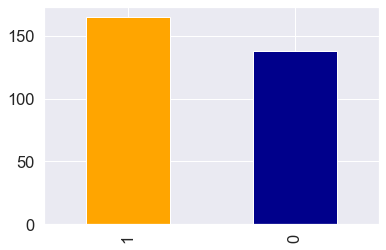

In [67]:
df.target.value_counts().plot(kind="bar", color=["orange", "darkblue"]);

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Comparing different columns with the target column

In [70]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [71]:
pd.crosstab(df.sex, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
sex,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,0,2,0,4,2,2,...,4,3,3,1,1,0,3,1,1,0
1,1,1,3,1,3,2,3,6,6,6,...,4,4,6,3,2,4,0,0,0,1


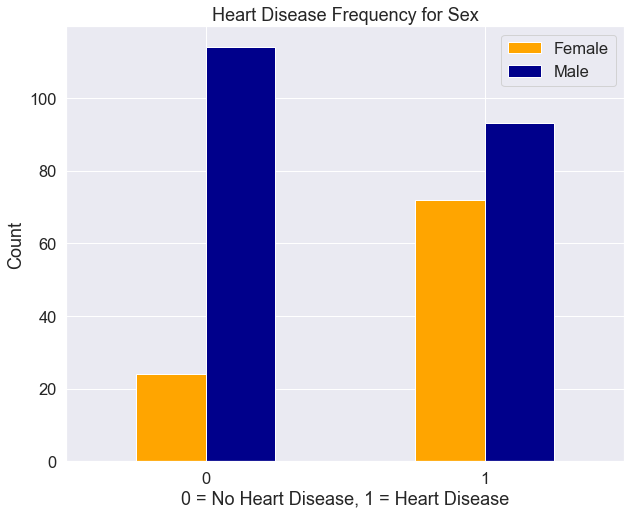

In [72]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 8), color=["orange", "darkblue"])
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.title("Heart Disease Frequency for Sex");

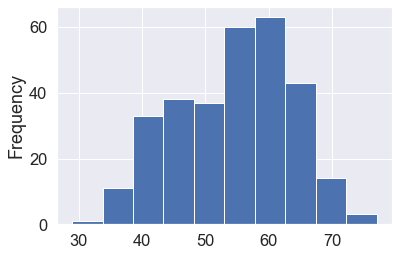

In [73]:
# Checking for outliers and distrubution
df.age.plot.hist();

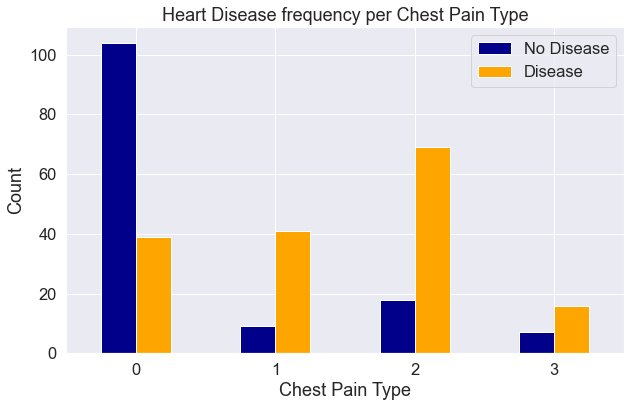

In [74]:
# "cp" = Chest Pain reported
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["darkblue", "orange"])
plt.title("Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

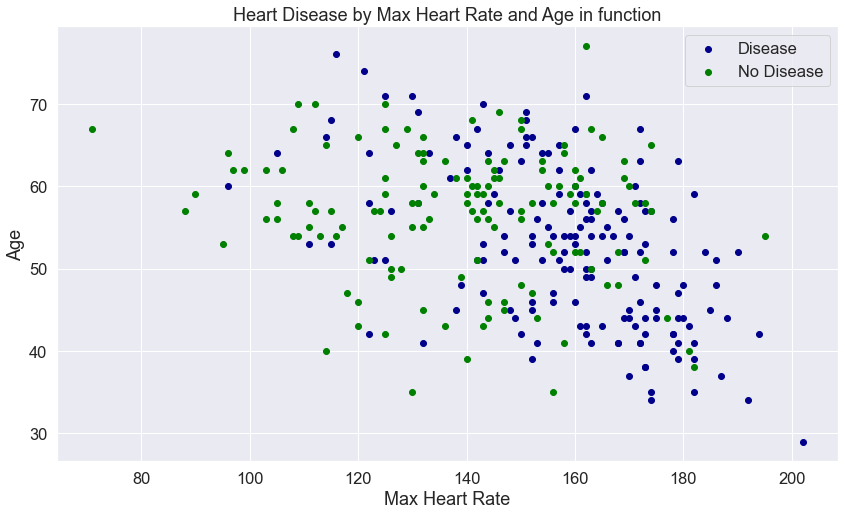

In [75]:
# Plotting examples with Heart Disease
plt.figure(figsize=(14, 8))
plt.scatter(df.thalach[df.target==1],
            df.age[df.target==1],
            c="darkblue")

# plotting examples with No Heart Disease
plt.scatter(df.thalach[df.target==0],
            df.age[df.target==0],
            c="green");
plt.title("Heart Disease by Max Heart Rate and Age in function")
plt.xlabel("Max Heart Rate")
plt.ylabel("Age")
plt.legend(["Disease", "No Disease"]);

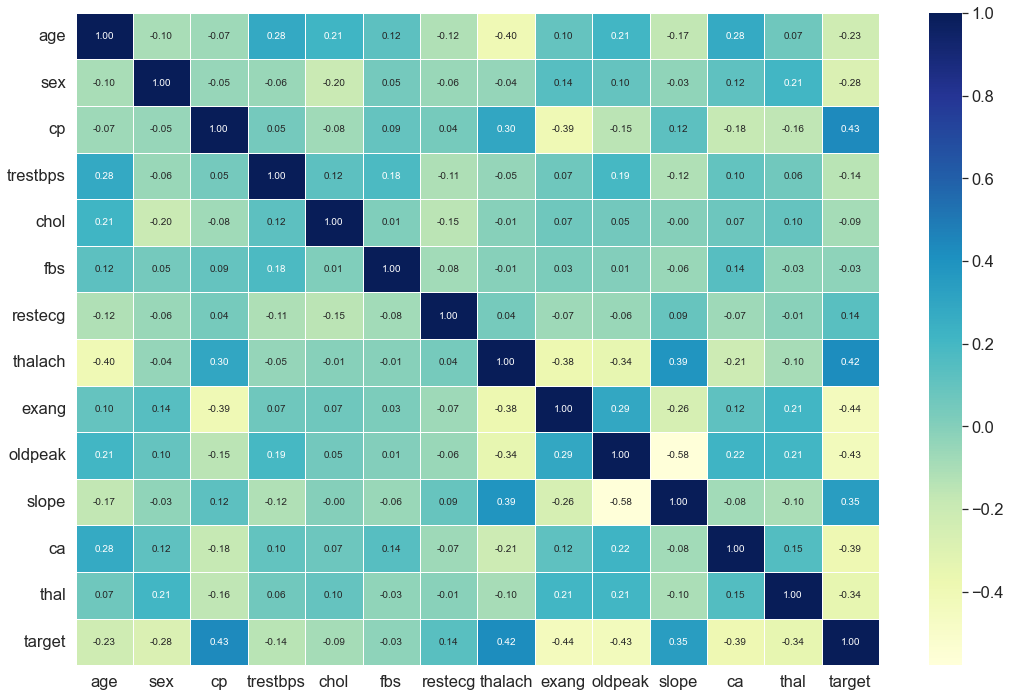

In [76]:
# Correlation Matrix using a heatmap
df.corr()
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [77]:
np.random.seed(42)

X = df.drop("target", axis=1)
y = df["target"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
# Models in a function for faster implementation

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Fitting and scoring the model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    A dictionary of different sklearn models
    
    """
    
    np.random.seed(42)
    
    # A dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [79]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/hemanth/Desktop/heart-disease-prediction/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

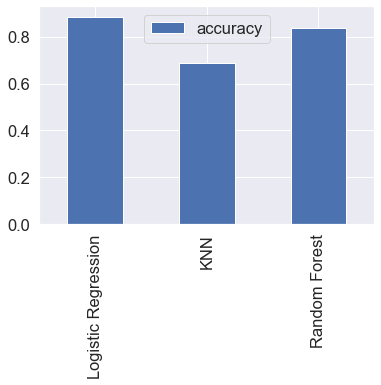

In [80]:
# Comparing the models

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Improving the model

Using
- `Hyperparameter tuning`
- `Confusion Matrix`
- `Precision`
- `Recall`
- `F1 score`
- `Feature importance`
- `Classification report`
- `ROC cure & AUC (Area under the curve)`

`Hyperparameter tuning`

Tuning KNN

In [81]:
train_scores = []
test_scores = []

# List of different n_neighbors value
neighbors = range(1, 21)

# KNN instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fitting
    knn.fit(X_train, y_train)
    
    # Updating the train scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Updating the test scores
    test_scores.append(knn.score(X_test, y_test))

In [82]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [83]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%


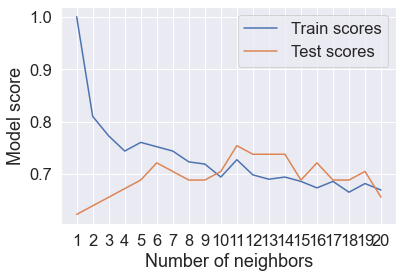

In [84]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1, 21, 1))
print (f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

### Tuning LogisticRegression  `Using RandomizedSearchCV`

In [85]:
# grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 5),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [86]:
# LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fitting the model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [87]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [88]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Tuning `RandomForestClassifier`

In [89]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# fitting the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 1...
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720,
       725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785,
       790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850,
       855, 860, 865, 870, 875, 880, 885, 890

In [90]:
rs_rf.best_params_

{'n_estimators': 775,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': None}

In [91]:
# Elaluating the RandomForestCLassifier model

rs_rf.score(X_test, y_test)

0.8688524590163934

Comparing with the orginal model scores

In [92]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Using `GridSearchCV` for hyperparameter tuning

Using LogisticRegression model as it provides the highest scores, 
attempting to improve them using `GridSearchCV`.

In [93]:
# Various hyperparameters for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fitting the grid hyperparameter model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [94]:
# best hyperparameter

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
# Evaluation of the grid search LogisticRegression

gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [96]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

`LogisticRegression` performs well after the hyperparameter tuning

Evaluating the tuned model with - 
- `ROC curve` and `AUC score`
- `Confusion matrix`
- `Classification report`
- `Precision`, `recall` and `F1-score`

Making predictions with the tuned model for making comparision

In [97]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/hemanth/Desktop/heart-disease-prediction/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


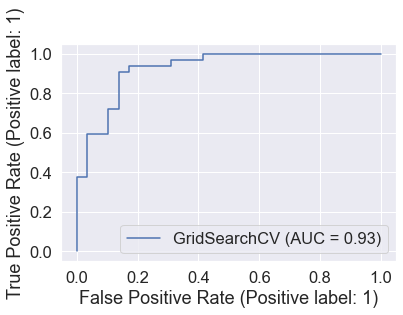

In [98]:
# ROC curve and compute AUC 

plot_roc_curve(gs_log_reg, X_test, y_test);

In [99]:
# Confusion Matrix heatmap using Seaborn
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


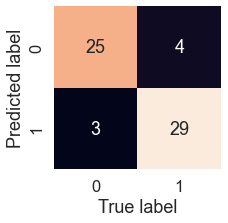

In [100]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [101]:
# Classification report, precision, recall and f1-score
 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Precision, accuracy, recall and f1-score using `cross-validation`

In [102]:
# using the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
# classifier model with best parameters
clf = LogisticRegression(C=20433597178569418,
                         solver="liblinear")

In [104]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8283060109289618

In [105]:
# Cross-validated precision

cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8230422730422731

In [106]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [107]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8485836385836386

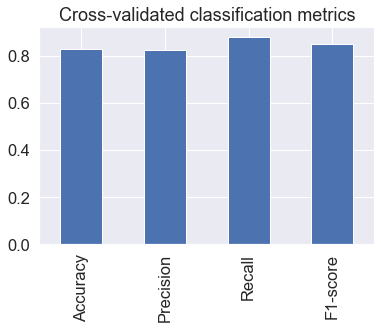

In [109]:
# Cross-validated metrics visualisation 

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

#### Feature Importance

In [112]:
# Ftiiing an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

# checking coef_
clf.coef_

array([[-0.00848847, -1.77620855,  0.86147896, -0.01759174, -0.00375794,
         0.29759625,  0.58836016,  0.01884799, -1.15103872, -0.65973232,
         0.76509574, -0.85981554, -1.00570857]])

In [113]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.008488468128661763,
 'sex': -1.776208548683161,
 'cp': 0.8614789578542507,
 'trestbps': -0.017591739229221692,
 'chol': -0.0037579388803973554,
 'fbs': 0.2975962539671243,
 'restecg': 0.5883601637256785,
 'thalach': 0.01884799320361544,
 'exang': -1.1510387192347034,
 'oldpeak': -0.6597323235040025,
 'slope': 0.7650957398486024,
 'ca': -0.8598155362844601,
 'thal': -1.0057085668568044}

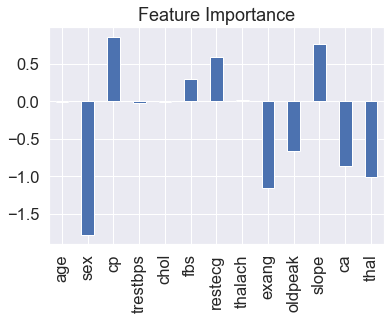

In [114]:
# Plotting the feature_dict
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

### Experimentation

Some questions to ask
    
* Collect more data?
* Improve the current models?
* Using a better model like XGBoost or CatBoost?